# Now load the saved model and re-run the same frog-or-not tests


In [1]:
from tensorflow import keras

model = keras.models.load_model('saved_model/frog_model')


## Done!

In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

## Test with outside images

### Load the images

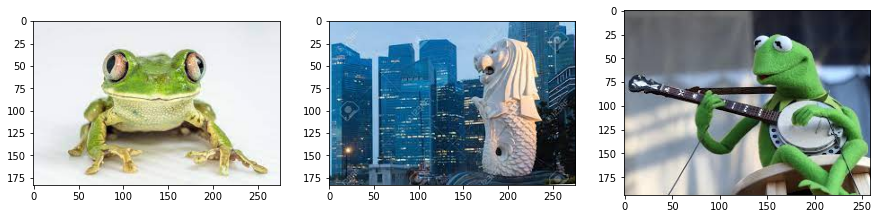

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

img_dir = 'C:\\Users\\oli_n\\pycode\\Jupyter\\internet_images\\'

internet_frog = Image.open(img_dir + 'frog.jpg')
internet_merlion = Image.open(img_dir + 'merlion.jpg')
internet_kermit = Image.open(img_dir + 'kermit.jpg')

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(internet_frog)
plt.subplot(1,3,2)
plt.imshow(internet_merlion)
plt.subplot(1,3,3)
plt.imshow(internet_kermit)
plt.show()

### Convert images to fit the input requirements of the AI and create shortcut functions

In [4]:
import numpy as np

internet_frog_small = internet_frog.resize((32,32))
internet_merlion_small = internet_merlion.resize((32,32))
internet_kermit_small = internet_kermit.resize((32,32))


new_imgs = np.stack([np.asarray(internet_frog_small),
                     np.asarray(internet_merlion_small),
                     np.asarray(internet_kermit_small)],
                    axis=0)

def normalise(in_img):
    # Assume 0 to max.
    out_img = in_img / in_img.max()
    return out_img


def infer_img(img):

    for i, im in enumerate(img):
        plt.figure(figsize=(4, 2))

        plt.xticks([])
        plt.yticks([])
        plt.imshow(im, cmap=plt.cm.binary)
        plt.show()

        output = model.predict(img[i:i+1])
        if output[0,0] > output[0,1]:
            is_frog = False
        else:
            is_frog = True

        print(f'Inference: {output}: Is frog? {is_frog}')


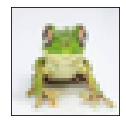

Inference: [[-0.24255617  1.0440341 ]]: Is frog? True


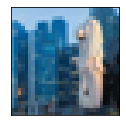

Inference: [[ 5.741711  -6.2221937]]: Is frog? False


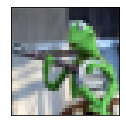

Inference: [[ 2.025755  -1.7767718]]: Is frog? False


In [5]:

out = infer_img(normalise(new_imgs))

## That's great, but I want to test it against a different image from google...

### OK- can.  We need to make the pipeline clear.

In [ ]:
import requests
download_dir = 'C:\\Users\\oli_n\\pycode\\R4 Didactic\\frog_downloads\\'

img_address = 'https://media.nature.com/w700/magazine-assets/d41586-017-03864-w/d41586-017-03864-w_15072998.jpg'

# -------- DOWNLOAD IMAGE
response = requests.get(img_address)

# -------- SAVE IMAGE
file = open(download_dir + "test_image.png", "wb")
file.write(response.content)
file.close()

# ----------  DISPLAY IMAGE
test_img = Image.open(download_dir + "test_image.png")
plt.imshow(test_img)
plt.show()

# ----------  RESIZE IMAGE
new_size = (32, 32)
test_img = test_img.resize(new_size)

# ----------  FORMAT DATA
new_imgs = np.stack([np.asarray(test_img),], axis=0)

# -----------  INFER WITH AI
out = infer_img(normalise(new_imgs))

## Woohoo!